In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns
import pandas as pd
import earthpy as et
import datetime
import matplotlib.ticker

# Handle data time conversion between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
path_to_working_directory = os.path.join(et.io.HOME, "earth-analytics", "LCRWS")

if os.path.exists(path_to_working_directory):
    print("Path exists, set as working directory")
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))
else:
    print("Path does not exist, creating directories")
    os.mkdir(path_to_working_directory)
    os.chdir(os.path.join(et.io.HOME, "earth-analytics", "LCRWS"))

Path does not exist, creating directories


In [36]:
budget_path = os.path.join(path_to_working_directory, "LewisandClark_Redesigned_local.csv")

In [65]:
budget_df = pd.read_csv(budget_path)
budget_df.columns

Index(['time', 'period', 'step', 'zon', 'storage_in', 'ch_in', 'wells_in',
       'river_in', 'hd_in', 'recharge_in', 'other_zones_in', 'total_in',
       'stoarge_out', 'ch_out', 'wells_out', 'river_out', 'hd_out',
       'recharge_out', 'other_zones_out', 'total_out', 'in_out',
       'perecent_error', 'z1_in', 'z2_in', 'z3_in', 'z4_in', 'z5_in', 'z6_in',
       'z7_in', 'z1_out', 'z2_out', 'z3_out', 'z4_out', 'z5_out', 'z6_out',
       'z7_out'],
      dtype='object')

In [66]:
budget_df["river_contribution"] = (budget_df["river_in"]/budget_df["total_in"])/(budget_df["wells_out"]/budget_df["total_in"])*100
budget_df
budget_df.sort_values(by=["period","step","zon"],ascending=True)
budget_df.max()
budget_df["river_contribution_2"] = (budget_df["river_in"]/budget_df["total_in"]*100)
budget_df["well_contribution"] = (budget_df["wells_out"]/budget_df['total_out']*100)
budget_df["total_contribution"] = budget_df['river_contribution_2']/budget_df["well_contribution"]
budget_df["storage_contribution"] = budget_df['stoarge_out']/budget_df['total_out']
df = budget_df.groupby(['zon']).agg({'river_contribution_2':['mean']})
dg = budget_df.groupby(['zon']).agg({'well_contribution':["mean"]})
df,dg


(    river_contribution_2
                     mean
 zon                     
 1.0            69.134677
 2.0            82.129784
 3.0            80.353115
 4.0            80.224938
 5.0            78.396927
 6.0            61.283598,
     well_contribution
                  mean
 zon                  
 1.0         87.592067
 2.0         96.102465
 3.0         88.436787
 4.0         92.135978
 5.0         85.446818
 6.0         84.933641)

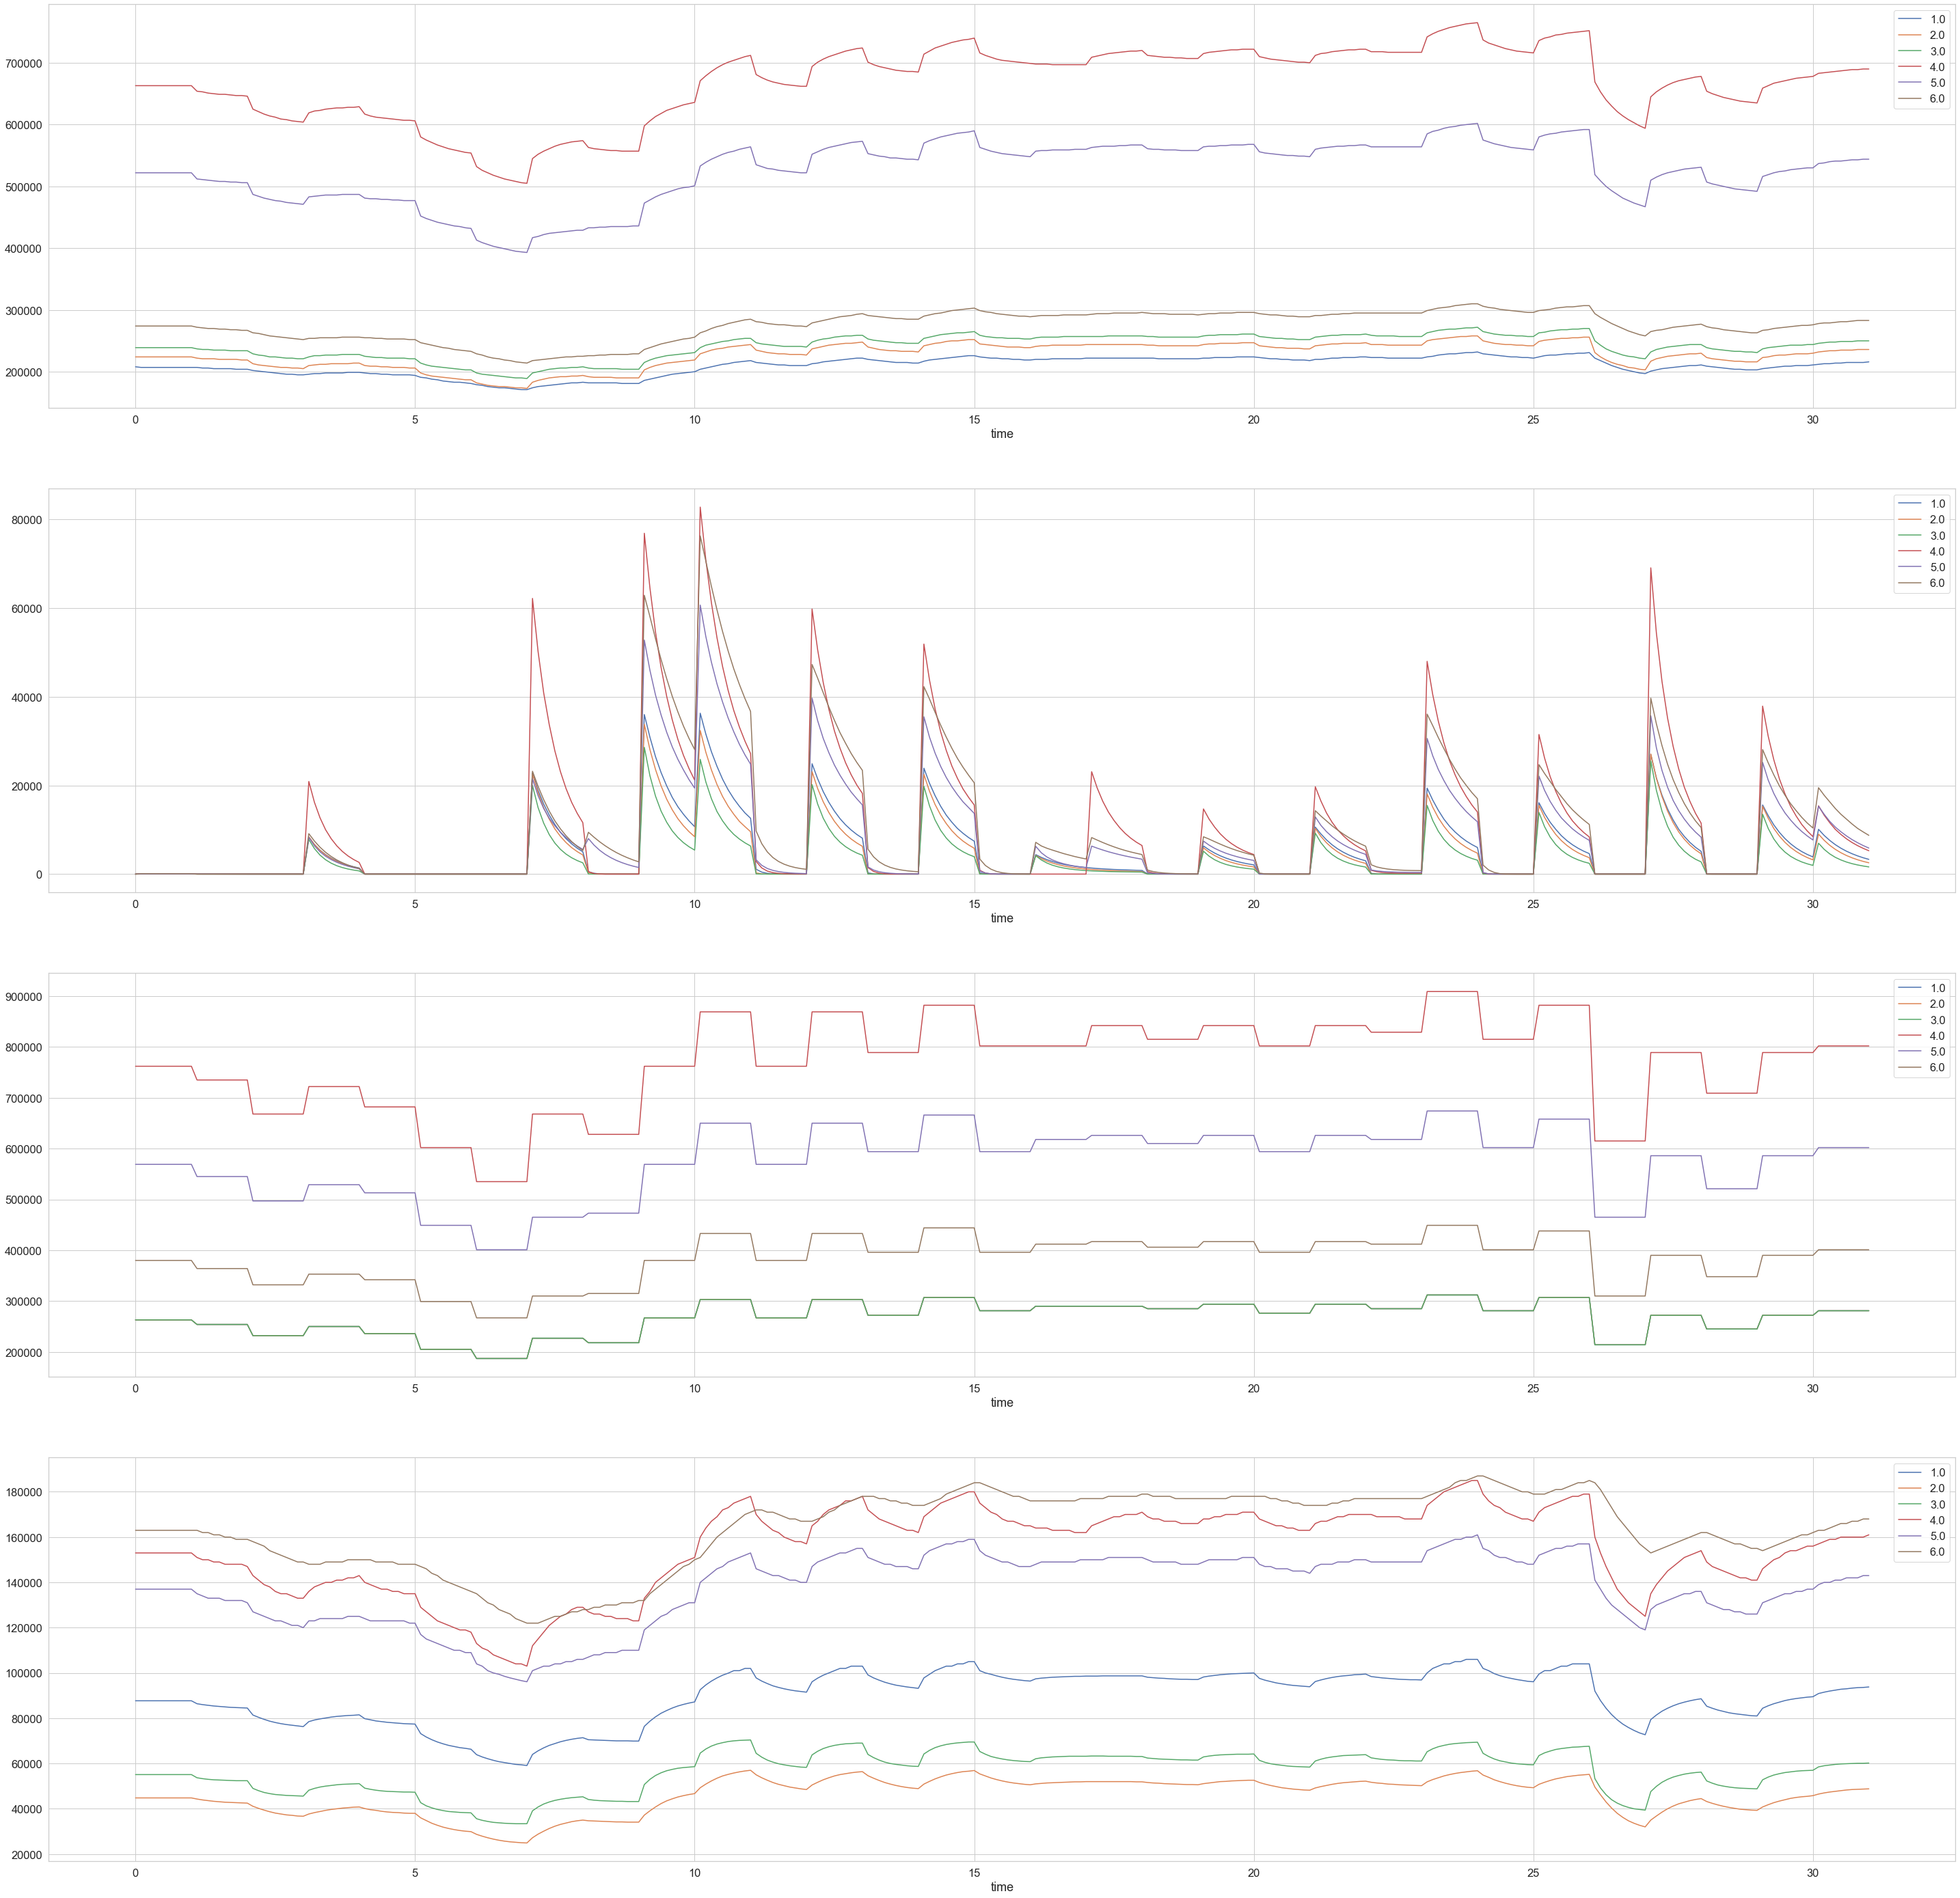

In [83]:
fig, (ax,ax1,ax3,ax4)= plt.subplots(4,1,figsize=(50,50))

for i, k in budget_df.groupby('zon'):
    k.groupby("zon").plot(x="time",
                           y="river_in",
                           label=i,
                           ax=ax)
    
for p, o in budget_df.groupby('zon'):
    o.groupby("zon").plot(x="time",
                          y="storage_in",
                          label=p,
                          ax=ax1)
    
for g, q in budget_df.groupby('zon'):
    q.groupby("zon").plot(x='time',
                          y="wells_out",
                          label=g,
                          ax=ax3)
    
for r, s in budget_df.groupby('zon'):
    s.groupby("zon").plot(x='time',
                          y="other_zones_in",
                          label=r,
                          ax=ax4)